In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

from scipy.signal import find_peaks

In [69]:
ts = pd.read_csv('amz.csV')
ts = ts.set_index('Date')

In [70]:
ts.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,15.5775,15.6490,15.5005,15.5175,15.5175,40960000
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000


In [71]:
print('mean: {0:.2f}, standard deviation: {1:.2f}, quantile: {2:.2f}'.format(np.mean(ts['Close']), np.std(ts['Close']), np.quantile(ts['Close'], 0.5)))

mean: 94.07, standard deviation: 49.63, quantile: 91.58


In [72]:
coeffs = pywt.wavedec(ts['Close'], 'haar', level=1)

dwt_features = []

for i in range(2):
    dwt_features.extend(coeffs[i])

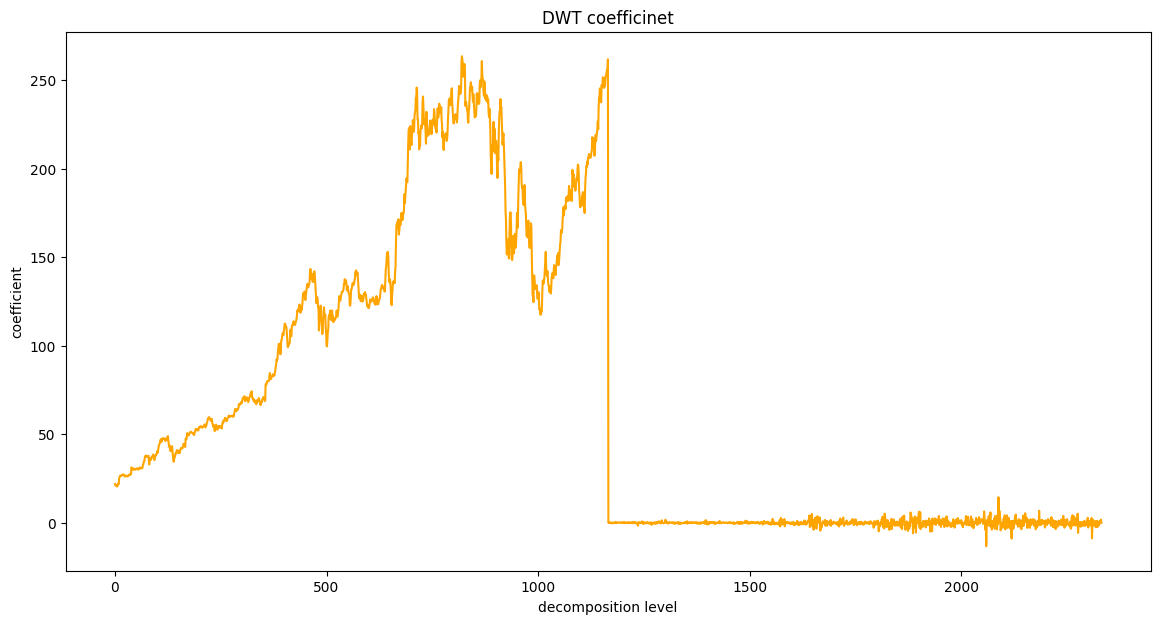

In [73]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(dwt_features, color='orange')

ax.set_title('DWT coefficinet')
ax.set_xlabel('decomposition level')
ax.set_ylabel('coefficient')

plt.show()

In [74]:
cA, cD = pywt.dwt(ts['Close'], 'haar')

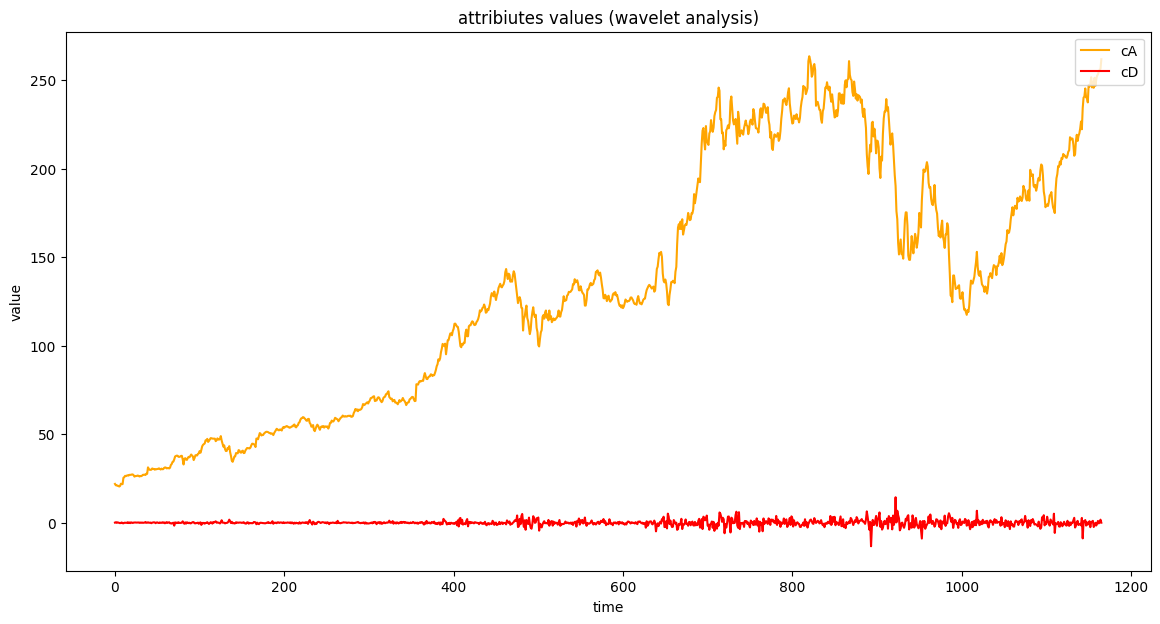

In [75]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(cA, color='orange', label='cA')
ax.plot(cD, color='red', label='cD')

ax.set_title('attribiutes values (wavelet analysis)')
ax.set_xlabel('time')
ax.set_ylabel('value')
ax.legend(loc='upper right')

plt.show()

In [76]:
peaks, _ = find_peaks(ts['Close'])
valleys, _ = find_peaks(-ts['Close'])

C:\Users\mateu\AppData\Local\Temp\ipykernel_14776\1424695962.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(peaks, ts['Close'][peaks], s=5, color='green', zorder=1)
C:\Users\mateu\AppData\Local\Temp\ipykernel_14776\1424695962.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(valleys, ts['Close'][valleys], s=5, color='red', zorder=2)


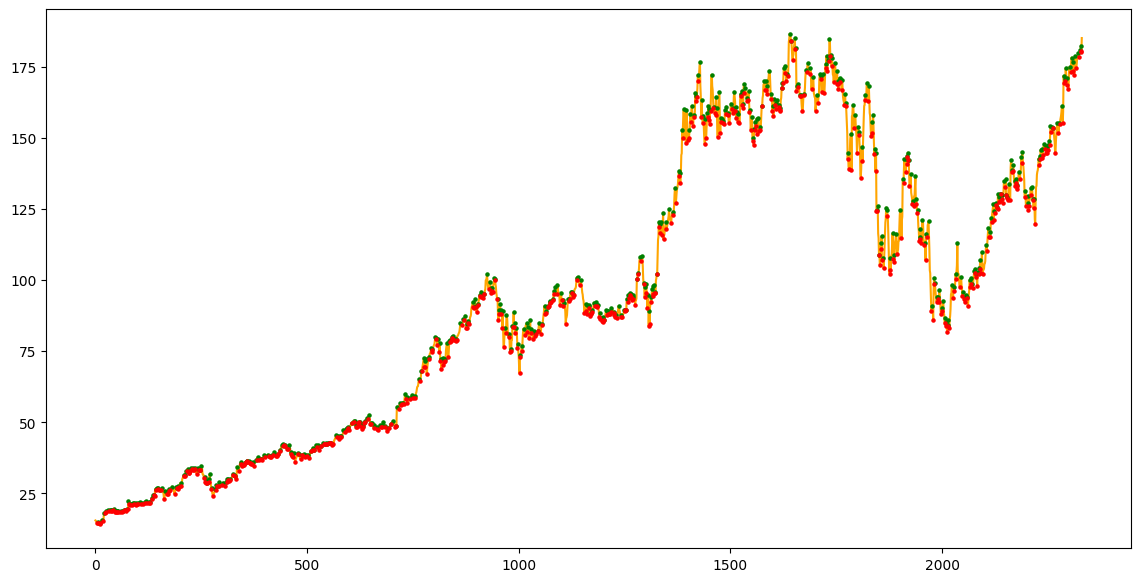

In [77]:
fig, ax = plt.subplots(figsize=(14, 7))

plt.plot(np.arange(ts.shape[0]), ts['Close'], color='orange', zorder=0)
plt.scatter(peaks, ts['Close'][peaks], s=5, color='green', zorder=1)
plt.scatter(valleys, ts['Close'][valleys], s=5, color='red', zorder=2)

plt.show()